In [11]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

# Overview the Data Set

We will use "sign language digits data set" for this tutorial.

In this data there are 2062 sign language digits images.

As you know digits are from 0 to 9. Therefore there are 10 unique sign.

At the beginning of tutorial we will use only sign 0 and 1 for simplicity.

In data, sign zero is between indexes 204 and 408. Number of zero sign is 205.

Also sign one is between indexes 822 and 1027. Number of one sign is 206. Therefore, we will use 205 samples from each classes(labels).

Note: Actually 205 sample is very very very little for deep learning. But this is tutorial so it does not matter so much.

Lets prepare our X and Y arrays. X is image array (zero and one signs) and Y is label array (0 and 1).

(-0.5, 63.5, 63.5, -0.5)

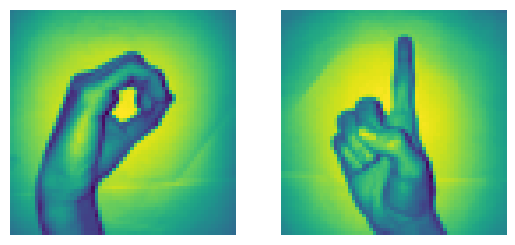

In [14]:
# load data set

x_l = np.load('X.npy')
Y_l = np.load('Y.npy')

img_size = 64
plt.subplot(1, 2, 1)
plt.imshow(x_l[260].reshape(img_size, img_size))
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(x_l[900].reshape(img_size, img_size))
plt.axis('off')

In order to create image array, I concatenate zero sign and one sign arrays

Then I create label array 0 for zero sign images and 1 for one sign images.

In [15]:
# Join a sequence of arrays along an row axis.
X = np.concatenate((x_l[204:409], x_l[822:1027] ), axis=0) # from 0 to 204 is zero sign and from 205 to 410 is one sign 
z = np.zeros(205)
o = np.ones(205)
Y = np.concatenate((z, o), axis=0).reshape(X.shape[0],1)
print("X shape: " , X.shape)
print("Y shape: " , Y.shape)

X shape:  (410, 64, 64)
Y shape:  (410, 1)


In [16]:
# Then lets create x_train, y_train, x_test, y_test arrays
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=42)
number_of_train = X_train.shape[0]
number_of_test = X_test.shape[0]

In [17]:
X_train_flatten = X_train.reshape(number_of_train,X_train.shape[1]*X_train.shape[2])
X_test_flatten = X_test .reshape(number_of_test,X_test.shape[1]*X_test.shape[2])
print("X train flatten",X_train_flatten.shape)
print("X test flatten",X_test_flatten.shape)

X train flatten (348, 4096)
X test flatten (62, 4096)


In [18]:
x_train = X_train_flatten.T
x_test = X_test_flatten.T
y_train = Y_train.T
y_test = Y_test.T
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (4096, 348)
x test:  (4096, 62)
y train:  (1, 348)
y test:  (1, 62)


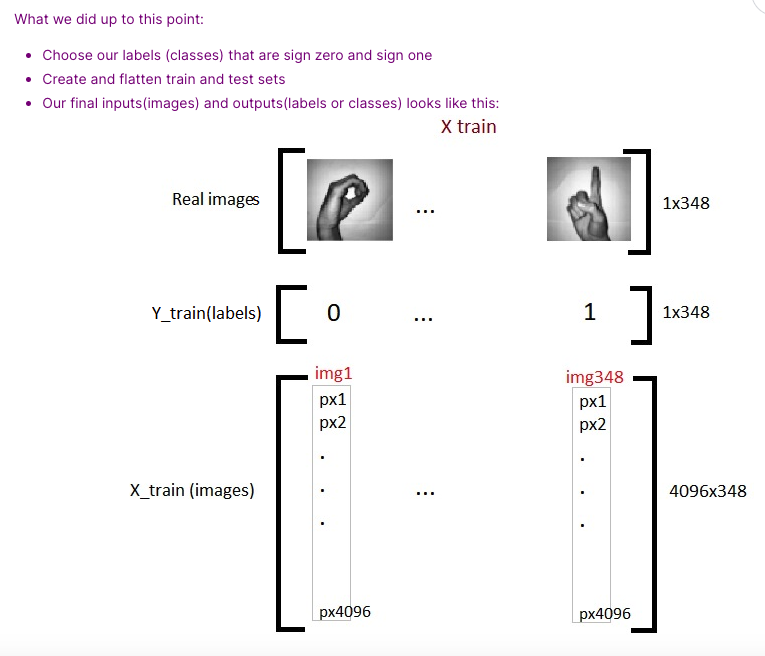

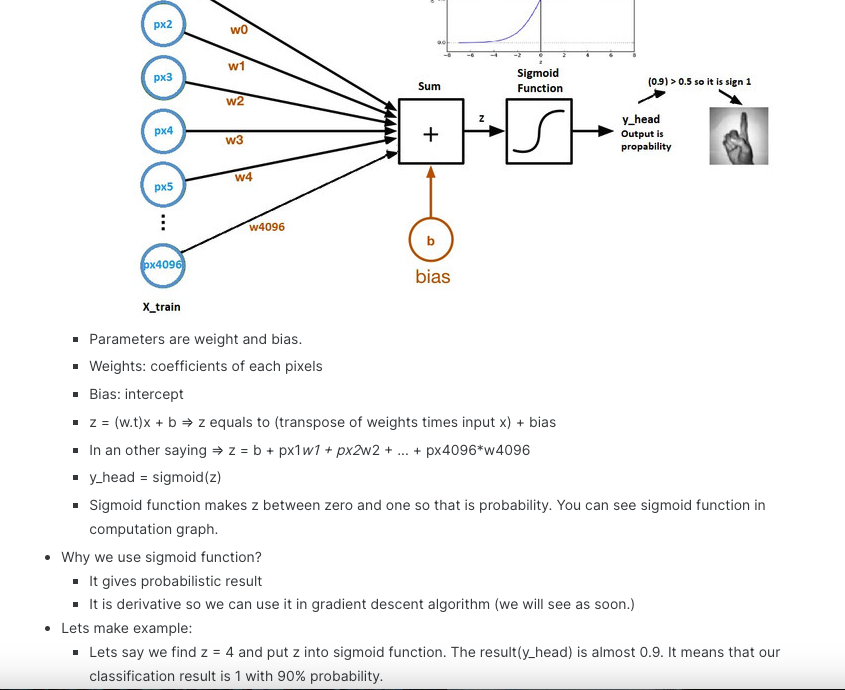

In [22]:
from IPython.display import display
from PIL import Image

# Fotoğrafı yükleme
img1 = Image.open("1.png")
img2 = Image.open("2.png")
# Fotoğrafı görüntüleme
display(img1)
display(img2)

# Initializing parameters


As you know input is our images that has 4096 pixels(each image in x_train).

Each pixels have own weights.

The first step is multiplying each pixels with their own weights.

The question is that what is the initial value of weights?

There are some techniques that I will explain at artificial neural network but for this time initial weights are 0.01.

Okey, weights are 0.01 but what is the weight array shape? As you understand from computation graph of logistic regression, it is (4096,1)

Also initial bias is 0.

Lets write some code. In order to use at coming topics like artificial neural network (ANN), I make definition(method).

In [8]:
# short description and example of definition (def)
def dummy(parameter):
    dummy_parameter = parameter + 5
    return dummy_parameter
result = dummy(3)     # result = 8

# lets initialize parameters
# So what we need is dimension 4096 that is number of pixels as a parameter for our initialize method(def)
def initialize_weights_and_bias(dimension):
    w = np.full((dimension,1),0.01)
    b = 0.0
    return w, b

w,b = initialize_weights_and_bias(4096)

In [9]:
w

array([[0.01],
       [0.01],
       [0.01],
       ...,
       [0.01],
       [0.01],
       [0.01]])

In [10]:
b

0.0

# Forward Propagation

The all steps from pixels to cost is called forward propagation

z = (w.T)x + b => in this equation we know x that is pixel array, we know w (weights) and b (bias) so the rest is calculation. (T is transpose)

Then we put z into sigmoid function that returns y_head(probability). When your mind is confused go and look at computation graph. Also equation of sigmoid function is in computation graph.

Then we calculate loss(error) function.

Cost function is summation of all loss(error).

Lets start with z and the write sigmoid definition(method) that takes z as input parameter and returns y_head(probability)

In [23]:
# calculation of z
#z = np.dot(w.T,x_train)+b
def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head

In [24]:
y_head = sigmoid(0)
y_head

0.5

In [27]:
# Forward propagation steps:
# find z = w.T*x+b
# y_head = sigmoid(z)
# loss(error) = loss(y,y_head)
# cost = sum(loss)
def forward_propagation(w,b,x_train,y_train):
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z) # probabilistic 0-1
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]      # x_train.shape[1]  is for scaling
    return cost 

# Optimization Algorithm with Gradient Descent- Backward propagation


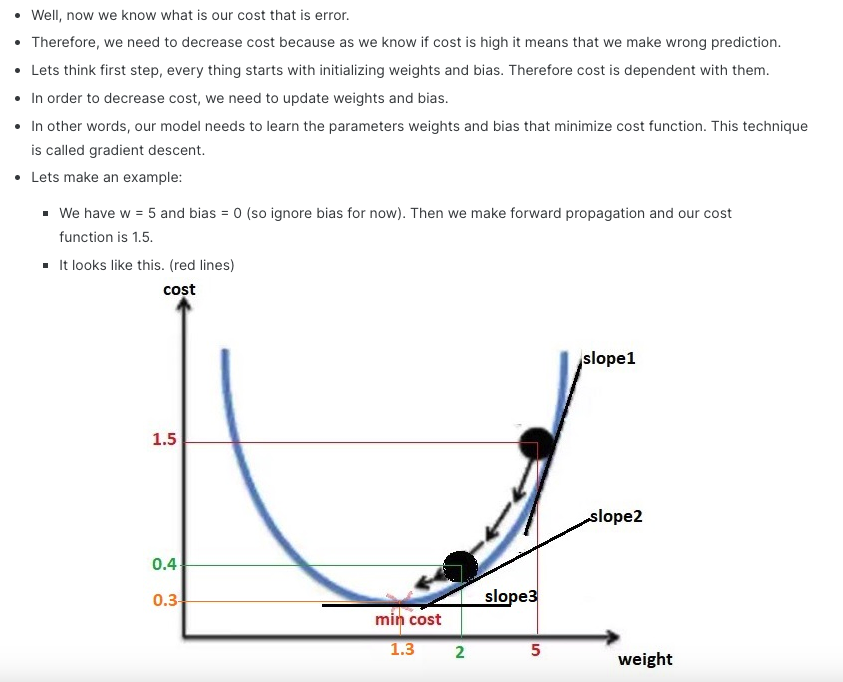

In [30]:
from IPython.display import display
from PIL import Image

# Fotoğrafı yükleme

img3 = Image.open("3.png")
# Fotoğrafı görüntüleme
display(img3)

In [31]:
# In backward propagation we will use y_head that found in forward progation
# Therefore instead of writing backward propagation method, lets combine forward propagation and backward propagation
def forward_backward_propagation(w,b,x_train,y_train):
    # forward propagation
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]      # x_train.shape[1]  is for scaling
    # backward propagation
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1] # x_train.shape[1]  is for scaling
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]                 # x_train.shape[1]  is for scaling
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}
    return cost,gradients

In [32]:
# Updating(learning) parameters
def update(w, b, x_train, y_train, learning_rate,number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []
    # updating(learning) parameters is number_of_iterarion times
    for i in range(number_of_iterarion):
        # make forward and backward propagation and find cost and gradients
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        # lets update
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    # we update(learn) parameters weights and bias
    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list
#parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate = 0.009,number_of_iterarion = 200)

In order to predict we have parameters. Therefore, lets predict.

In prediction step we have x_test as a input and while using it, we make forward prediction.

In [33]:
 # prediction
def predict(w,b,x_test):
    # x_test is a input for forward propagation
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    # if z is bigger than 0.5, our prediction is sign one (y_head=1),
    # if z is smaller than 0.5, our prediction is sign zero (y_head=0),
    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction
# predict(parameters["weight"],parameters["bias"],x_test)